<a href="https://www.kaggle.com/mohamadelshazly/house-prices-advanced-regression-techniques?scriptVersionId=88889453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv') 
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

we have 1460 row
LotFrontage    1201 non-null
Alley          91 non-null


In [5]:
nan_values = df_train.isna()
#nan_values
nan_columns = nan_values.any()
#nan_columns
columns_with_nan = df_train.columns[nan_columns].tolist()
columns_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
is_null_columns = {}
col_list = []
col_type = []
for x in df_train.columns:
    if df_train[x].isna().sum() > 0:
        is_null_columns[x] = df_train[x].isna().sum()
        col_list.append(x)
        col_type.append(df_train[x].dtype)
        
print(is_null_columns)
print("\n ")
print("we have %s columns of %s that have null values " % (len(is_null_columns),len(df_train.columns)))
print('we caculate the percentage of null values to every column for 1460 row')
null_df = pd.DataFrame()

null_df['num of null' ] = pd.DataFrame.from_dict(is_null_columns , orient='index')
#null_df.columns = ['col_name','col_type','num of null' ]
null_df['null_perc'] = round((null_df['num of null']/1460*100 ) , 2)
null_df['col_name'] = (col_list )
null_df['col_type'] = (col_type )

null_df

{'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 8, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}

 
we have 19 columns of 81 that have null values 
we caculate the percentage of null values to every column for 1460 row


,num of null,null_perc,col_name,col_type
LotFrontage,259,17.74,LotFrontage,float64
Alley,1369,93.77,Alley,object
MasVnrType,8,0.55,MasVnrType,object
MasVnrArea,8,0.55,MasVnrArea,float64
BsmtQual,37,2.53,BsmtQual,object
BsmtCond,37,2.53,BsmtCond,object
BsmtExposure,38,2.60,BsmtExposure,object
BsmtFinType1,37,2.53,BsmtFinType1,object
BsmtFinType2,38,2.60,BsmtFinType2,object
Electrical,1,0.07,Electrical,object


In [7]:
#df_train['MiscFeature'].head(20)
#null_df.info()
#df_train['LotFrontage'].dtype

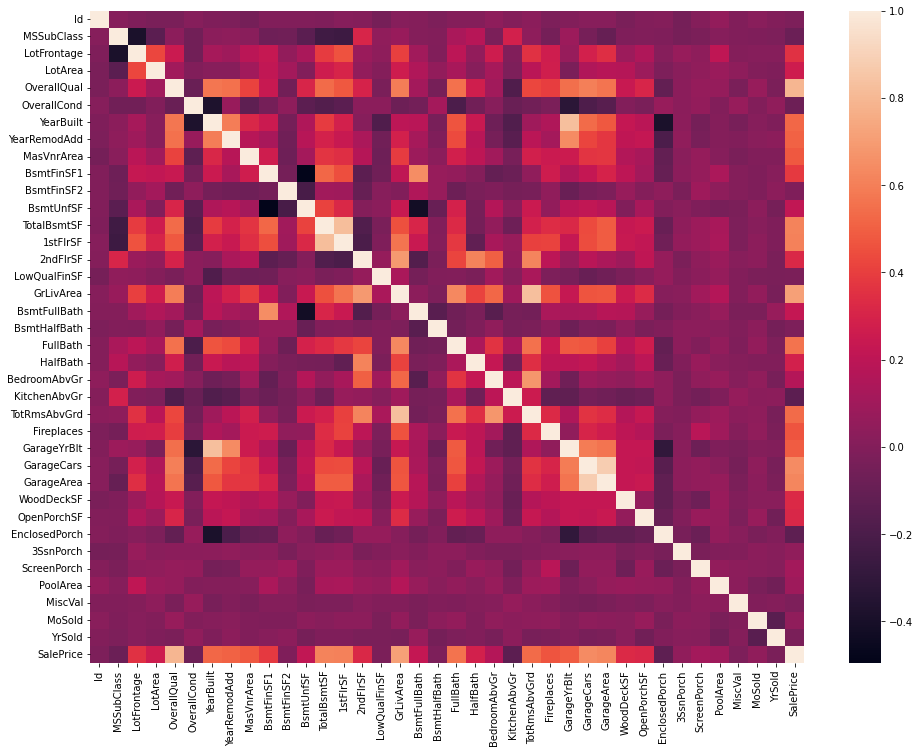

In [8]:
df_train_heatmap = df_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train_heatmap, vmax=1 );

In [9]:
print(df_train.corr())

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [10]:
#convert df_train.corr() - (tuple) - to array so that ot datafram

corr_df_train = np.asarray(df_train.corr())
df_train_corr = pd.DataFrame(corr_df_train)
df_train_corr.columns = df_train.corr().columns
df_train_corr.index = df_train.corr().index
df_train_corr


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [11]:
df_train_corr 
result1 = []
result2 = []
result3 = []

for i in df_train_corr.index:
    for j in df_train_corr.columns:
        if i == j:
            break
        if df_train_corr.loc[i,j] >=0.5:
            z = i+"-"+j
            result1.append(i)
            result2.append(j)
            result3.append(round((float(df_train_corr.loc[i,j])),2))
df_train_corr_5 = pd.DataFrame(result1)
df_train_corr_5['x'] = pd.DataFrame(result1)
df_train_corr_5['y'] = pd.DataFrame(result2)
df_train_corr_5['corr'] = pd.DataFrame(result3)
del df_train_corr_5[0]
df_train_corr_5

,x,y,corr
0,YearBuilt,OverallQual,0.57
1,YearRemodAdd,OverallQual,0.55
2,YearRemodAdd,YearBuilt,0.59
3,TotalBsmtSF,OverallQual,0.54
4,TotalBsmtSF,BsmtFinSF1,0.52
5,1stFlrSF,TotalBsmtSF,0.82
6,GrLivArea,OverallQual,0.59
7,GrLivArea,1stFlrSF,0.57
8,GrLivArea,2ndFlrSF,0.69
9,BsmtFullBath,BsmtFinSF1,0.65


In [12]:
# Create a mask for columns with missing values:
has_null = df_train.isna().any()
has_null
#df_train[has_null]
# Check % of missing values in each column:
#df_train[has_null].isna().mean()
# Plot the % of missing values in each column:
#df_train[has_null].isna().mean().plot.barh()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [13]:
df_train_corr 
result1 = []
result2 = []
result3 = []

for i in df_train_corr.index:
    for j in df_train_corr.columns:
        if i == j:
            break
        if df_train_corr.loc[i,j] <=-0.2:
            z = i+"-"+j
            result1.append(i)
            result2.append(j)
            result3.append(round((float(df_train_corr.loc[i,j])),2))
df_train_corr_5= pd.DataFrame(result1)
df_train_corr_5['x'] = pd.DataFrame(result1)
df_train_corr_5['y'] = pd.DataFrame(result2)
df_train_corr_5['corr'] = pd.DataFrame(result3)
del df_train_corr_5[0]
df_train_corr_5


,x,y,corr
0,LotFrontage,MSSubClass,-0.39
1,YearBuilt,OverallCond,-0.38
2,BsmtUnfSF,BsmtFinSF1,-0.50
3,BsmtUnfSF,BsmtFinSF2,-0.21
4,TotalBsmtSF,MSSubClass,-0.24
5,1stFlrSF,MSSubClass,-0.25
6,2ndFlrSF,1stFlrSF,-0.20
7,BsmtFullBath,BsmtUnfSF,-0.42
8,GarageYrBlt,OverallCond,-0.32
9,EnclosedPorch,YearBuilt,-0.39


In [14]:
#df_train.info()
col_obj =[]
col_typ =[]

for i in df_train.columns:
    if df_train[i].dtype == 'object':
        col_obj.append(i)
        col_typ.append('object')

#df_train_objects['col_name'] = pd.DataFrame(col_obj)
#df_train_objects['col_obj'] = pd.DataFrame(col_typ)
#df_train_objects.rename(columns={0:'col_name'})
#del df_train_objects[0]
#df_train_objects
x = np.asarray(col_obj)

df_train_objects = df_train[x]
df_train_objects

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
#df = pd.get_dummies(df, columns=['type'])
col_obj =[]

for i in df_train.columns:
    if df_train[i].dtype == 'object':
        col_obj.append(i)

x = np.asarray(col_obj)

df_train_dumies = pd.get_dummies(df_train_objects, columns=['MSZoning'])
df_train_dumies

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,NaN,NaN,NaN,WD,Normal,0,0,0,1,0
1,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,NaN,NaN,NaN,WD,Normal,0,0,0,1,0
2,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,NaN,NaN,NaN,WD,Normal,0,0,0,1,0
3,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,NaN,NaN,NaN,WD,Abnorml,0,0,0,1,0
4,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,NaN,NaN,NaN,WD,Normal,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,NaN,NaN,NaN,WD,Normal,0,0,0,1,0
1456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,NaN,MnPrv,NaN,WD,Normal,0,0,0,1,0
1457,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,NaN,GdPrv,Shed,WD,Normal,0,0,0,1,0
1458,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,NaN,NaN,NaN,WD,Normal,0,0,0,1,0


Text(37.5, 37.5, '1.00 %')


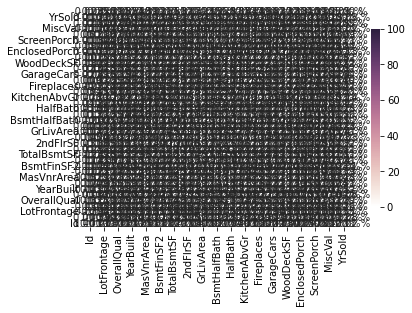

In [16]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_train_heatmap, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')
res.invert_yaxis()

for t in res.texts:
    t.set_text(t.get_text() + " %")
    
print(t)

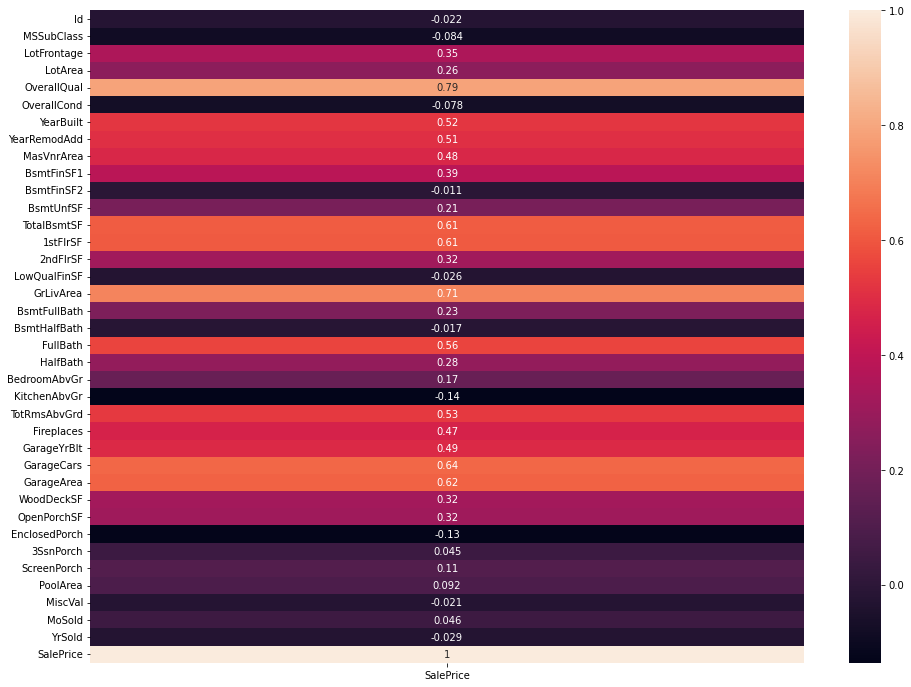

In [17]:
df_train_heatmap = df_train.corr()[['SalePrice']]

f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train_heatmap, vmax=1 , annot = True );

In [18]:
print(df_train.corr()[['SalePrice']])

               SalePrice
Id             -0.021917
MSSubClass     -0.084284
LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtFinSF2     -0.011378
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
LowQualFinSF   -0.025606
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
EnclosedPorch  -0.128578
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
SalePrice       1.000000


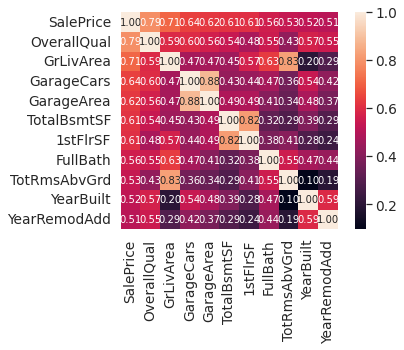

In [19]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()